<img src="https://user-images.githubusercontent.com/26833433/98702494-b71c4e80-237a-11eb-87ed-17fcd6b3f066.jpg">

- [Reference1](https://github.com/ultralytics/yolov5)
- [Reference2](https://www.ultralytics.com)

## Creating an inference pipeline to extract different clothing items from an image so that we can use the extracted items to generate embeddings

In [1]:
%cd .\yolov5
import matplotlib.pyplot as plt
import cv2
from detect import generate_bbox
%matplotlib inline

C:\Users\CHIRAG\Desktop\DataScience\AAIC\Notes\Case_Studies\Myntra\yolov5


In [2]:
# Reference:- https://github.com/ultralytics/yolov5
def extract_clothes(img_path: str): 
    '''
    Extract Topwear, Bottomwear and Footwear from a given Image
    Note: In case there are multiple items of the same class, the item with highest confidence score is returned.
    
    Args:
        img_path: Path to the image file that you want to extract clothes from.
        
    Returns:
        ouputs: Dict[numpy.ndarray], Dictionary containing detected Object Class as Keys and the image slice as Values. Also contains the original image.
    '''
    image = plt.imread(img_path)   
    results = generate_bbox(img_path, conf_thres=0.3)
    topwear_score, bottomwear_score, footwear_score = 0, 0, 0
    outputs = {"original_image": image}
    for result in results[0]:
        XMIN, YMIN, XMAX, YMAX = result[2]
        if (result[0] == 'Topwear') and (result[1] > topwear_score):
            topwear_score = result[1]
            outputs["topwear"] = image[YMIN:YMAX, XMIN:XMAX]
        elif (result[0] == 'Bottomwear') and (result[1] > bottomwear_score):
            bottomwear_score = result[1]
            outputs["bottomwear"] = image[YMIN:YMAX, XMIN:XMAX]
        elif (result[0] == 'Footwear') and (result[1] > footwear_score):
            footwear_score = result[1]
            outputs["footwear"] = image[YMIN:YMAX, XMIN:XMAX]
    return outputs

def plot_clothes(**images):
    '''
    Plot a dictionary of Images in a row
    
    Args:
        Dict: Image Names and Images in numpy.ndarray format
    
    Returns:
        matplotlib.figure object
    '''
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.axis("off")
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

## Inference Pipeline for Fashion Item Localization

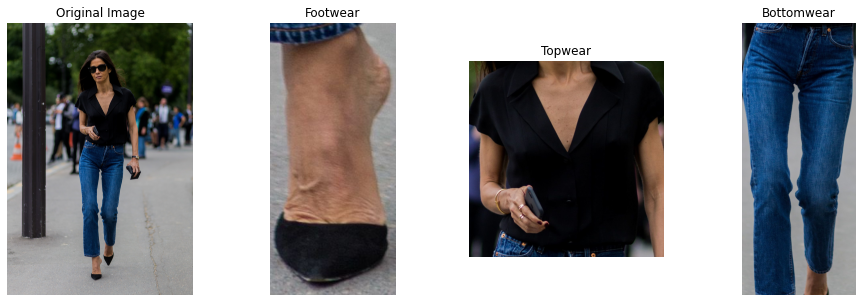

In [3]:
image_path = "..\\google-image-search-database\\womens_casual_top_wear\\dd35ba9fdd.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

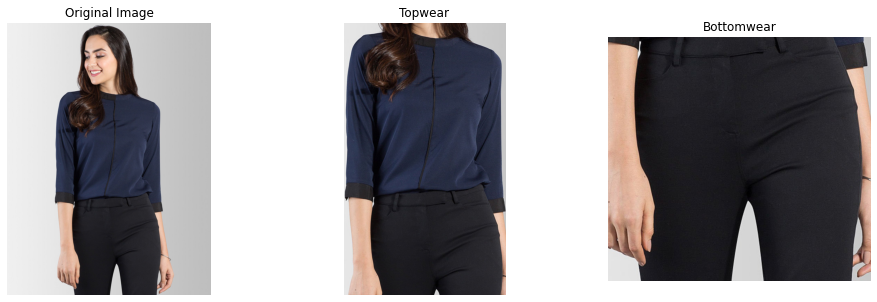

In [4]:
image_path = "..\\google-image-search-database\\womens_formal_top_wear\\a7ab4c4706.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

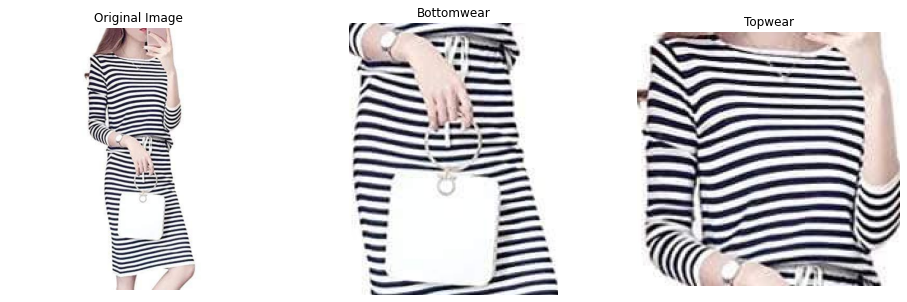

In [5]:
image_path = "..\\google-image-search-database\\womens_formal_top_wear\\b2fbbbe26a.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

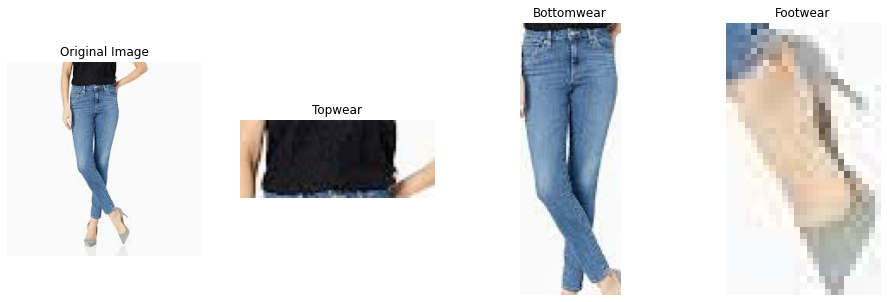

In [6]:
image_path = "..\\google-image-search-database\\womens_casual_top_wear\\01eb655284.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

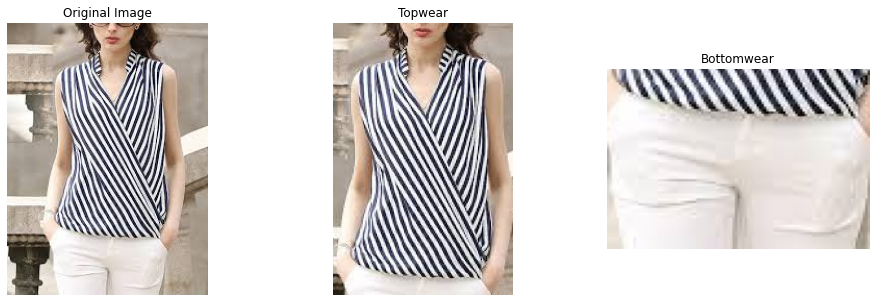

In [7]:
image_path = "..\\google-image-search-database\\womens_casual_top_wear\\6b7f870e55.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

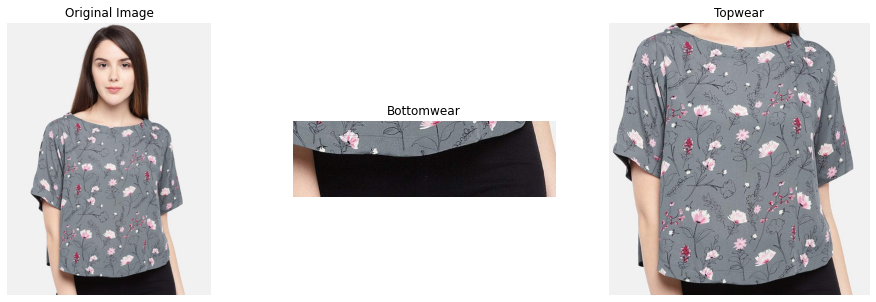

In [8]:
image_path = "..\\google-image-search-database\\womens_casual_top_wear\\2ba0c46495.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

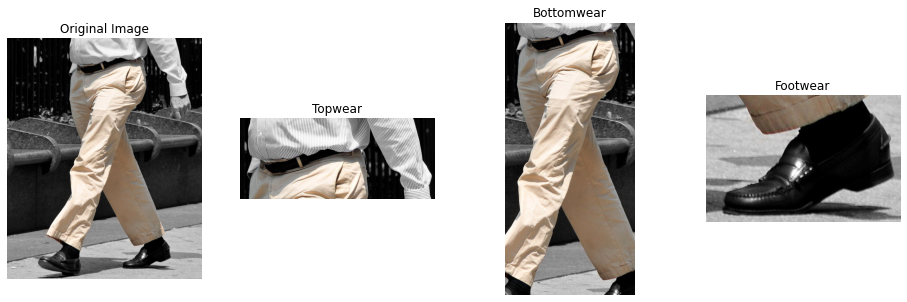

In [9]:
image_path = "..\\google-image-search-database\\mens_party_bottom_wear\\b2cb1b78f8.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

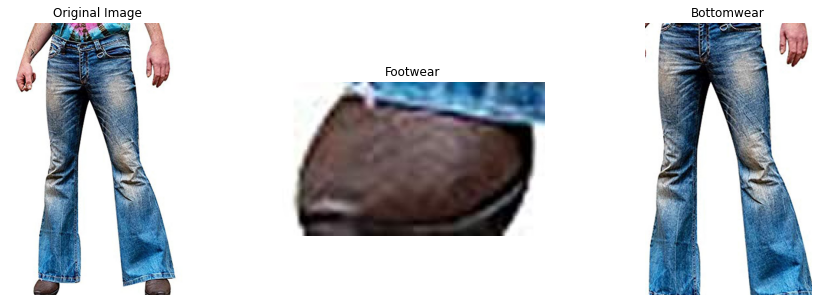

In [10]:
image_path = "..\\google-image-search-database\\mens_party_bottom_wear\\8c378671d1.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

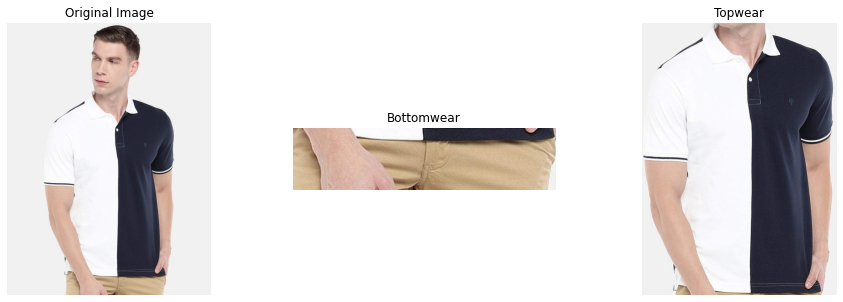

In [11]:
image_path = "..\\google-image-search-database\\mens_casual_top_wear\\0e5124460b.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

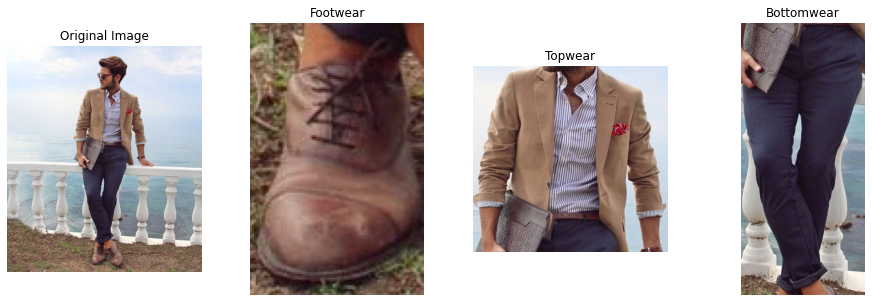

In [12]:
image_path = "..\\google-image-search-database\\mens_formal_top_wear\\159a86ac92.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

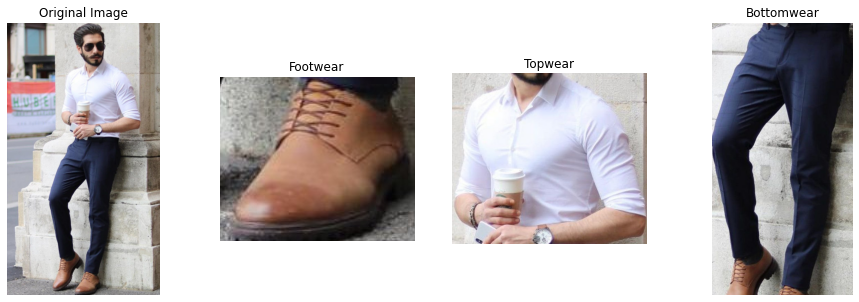

In [13]:
image_path = "..\\google-image-search-database\\mens_formal_top_wear\\aa1b730a6d.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

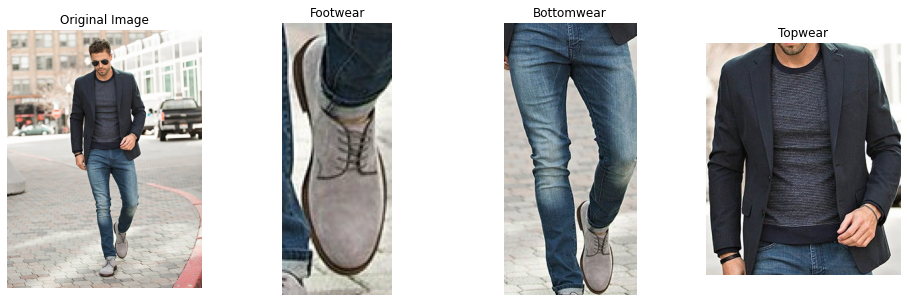

In [14]:
image_path = "..\\google-image-search-database\\mens_casual_top_wear\\19c5fb45ca.jpg"
outputs = extract_clothes(image_path)
plot_clothes(**outputs)

## Runtime speed test

In [15]:
%%timeit
outputs = extract_clothes(image_path)

799 ms ± 47.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
